In [86]:
import pandas as pd
import numpy as np

In [87]:
data = pd.read_csv("https://drive.google.com/uc?id=1yXPIcACVBkgWp6n-9DciiMME9OEXQmvo")

# **Data Pre-processing**

In [88]:
data.head()

,State_Code,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,VM_Messages,Avg_Day_Minutes,Avg_Day_Calls,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Calls,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn
0,MI,36,510,0,0,0,193.08,88,35.56,228.34,109,26.68,200.51,126,10.03,12.54,6,3.27,1,0
1,TN,16,510,0,0,0,165.62,69,30.50,246.13,95,28.76,150.08,99,7.51,12.30,9,3.21,1,0
2,DC,99,415,0,0,0,216.22,70,39.83,115.62,110,13.51,236.66,87,11.84,13.11,2,3.42,3,0
3,WY,159,510,0,0,0,182.16,85,33.56,218.48,126,25.54,201.62,133,10.08,9.32,2,2.43,1,0
4,NJ,77,510,0,0,0,134.16,98,24.72,230.27,139,26.92,244.35,140,12.22,15.76,3,4.11,0,0


In [8]:
data.shape

(3467, 20)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_Code              3467 non-null   object 
 1   Account_Length_Months   3467 non-null   int64  
 2   Area_Code               3467 non-null   int64  
 3   Intl_Plan               3467 non-null   int64  
 4   VM_Plan                 3467 non-null   int64  
 5   VM_Messages             3467 non-null   int64  
 6   Avg_Day_Minutes         3467 non-null   float64
 7   Avg_Day_Calls           3467 non-null   int64  
 8   Avg_Day_Charge          3467 non-null   float64
 9   Avg_Eve_Minutes         3467 non-null   float64
 10  Avg_Eve_Calls           3467 non-null   int64  
 11  Avg_Eve_Charge          3467 non-null   float64
 12  Avg_Night_Minutes       3467 non-null   float64
 13  Avg_Night_Calls         3467 non-null   int64  
 14  Avg_Night_Charge        3467 non-null   

In [11]:
data.isnull().sum()

State_Code                0
Account_Length_Months     0
Area_Code                 0
Intl_Plan                 0
VM_Plan                   0
VM_Messages               0
Avg_Day_Minutes           0
Avg_Day_Calls             0
Avg_Day_Charge            0
Avg_Eve_Minutes           0
Avg_Eve_Calls             0
Avg_Eve_Charge            0
Avg_Night_Minutes         0
Avg_Night_Calls           0
Avg_Night_Charge          0
Avg_Intl_Minutes          0
Avg_Intl_Calls            0
Avg_Intl_Charge           0
Customer_Service_Calls    0
Churn                     0
dtype: int64



---



---


**Inference:** There are no null values in the given dataset.

---

---





In [12]:
data.nunique()

State_Code                  51
Account_Length_Months      214
Area_Code                    3
Intl_Plan                    2
VM_Plan                      2
VM_Messages                 45
Avg_Day_Minutes           1694
Avg_Day_Calls              120
Avg_Day_Charge            1694
Avg_Eve_Minutes           1640
Avg_Eve_Calls              120
Avg_Eve_Charge            1463
Avg_Night_Minutes         1596
Avg_Night_Calls            127
Avg_Night_Charge           937
Avg_Intl_Minutes           166
Avg_Intl_Calls              21
Avg_Intl_Charge            166
Customer_Service_Calls      10
Churn                        2
dtype: int64

In [13]:
# The given dataset has been split into two datasets based on churn.
# 'churn_0' contains the data of customers who have not discontinued their service.
# 'churn_1' contains the data of customers who have discontinued their service.

churn_0 = data[data['Churn'] == 0]
churn_1 = data[data['Churn'] != 0]

In [14]:
churn_0.shape

(2969, 20)

In [15]:
churn_1.shape

(498, 20)

# **Analysing Customers' Data (EDA)**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-17-e544ba35080b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = data.corr()


<Axes: >

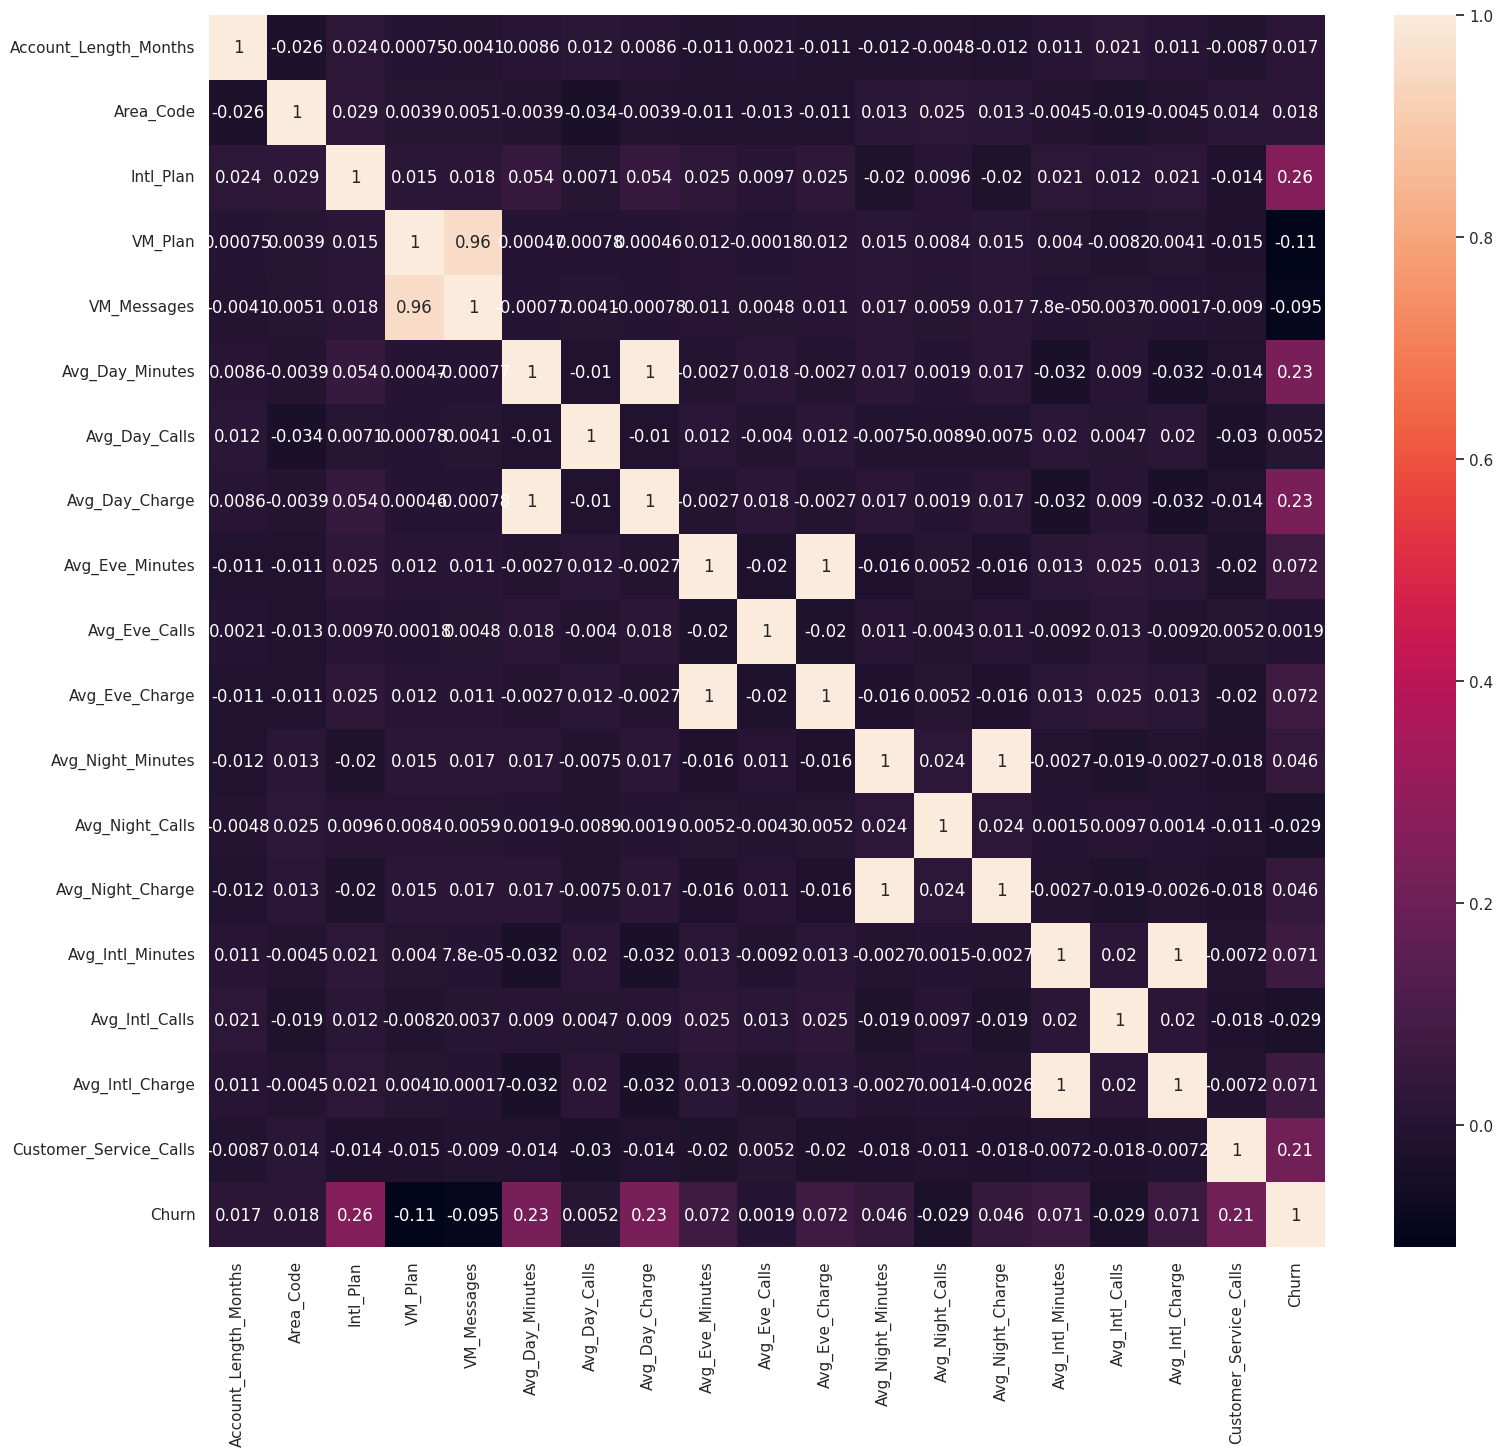

In [17]:
# Establishing correlation among all the parameters
# in the given dataset and plotting it in a heatmap.

corelation = data.corr()
sns.set(rc = {'figure.figsize': (18, 16)})
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

---

---




**Inference:** The above correlation plot indicates positive correlation of churn with **Intl_Plan**, **Avg_Day_Minutes**, **Avg_Day_Charge** and **Customer_Service_Calls** and negative correlation with **VM_Plan** and **VM_Messages**.

---


---




### **So now we analyse this inference using different graphs**

In [18]:
data['Intl_Plan'].unique()

array([0, 1])

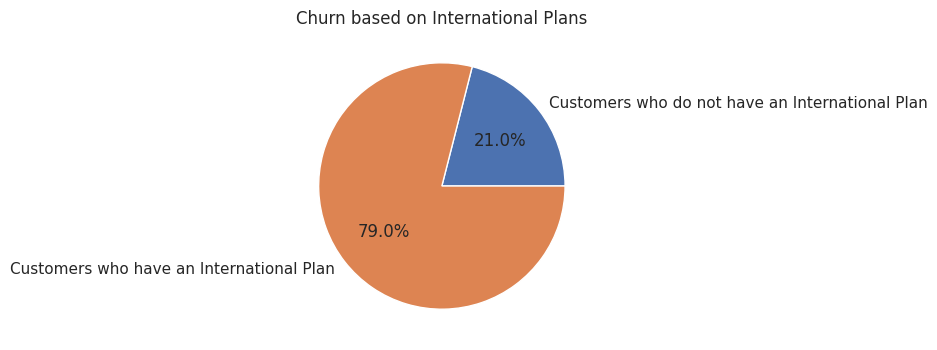

In [19]:
# Creating 2 different datasets based on whether the customers have an international plan or not
# and plotting the percentage of people who discontinued their service in each scenario.

Intl0 = data[data['Intl_Plan'] == 0]
Intl1 = data[data['Intl_Plan'] == 1]

x = Intl0['Churn'].sum()/Intl0['Churn'].count()
y = Intl1['Churn'].sum()/Intl1['Churn'].count()

plt.figure(figsize = [6,4])
plt.title('Churn based on International Plans')
plt.pie([x,y], labels = ['Customers who do not have an International Plan','Customers who have an International Plan'], autopct = '%1.1f%%')
plt.show()

---

---




**Inference:** The above pie chart indicates that customers who buy an international plan are more likely to discontinue their service.

---


---




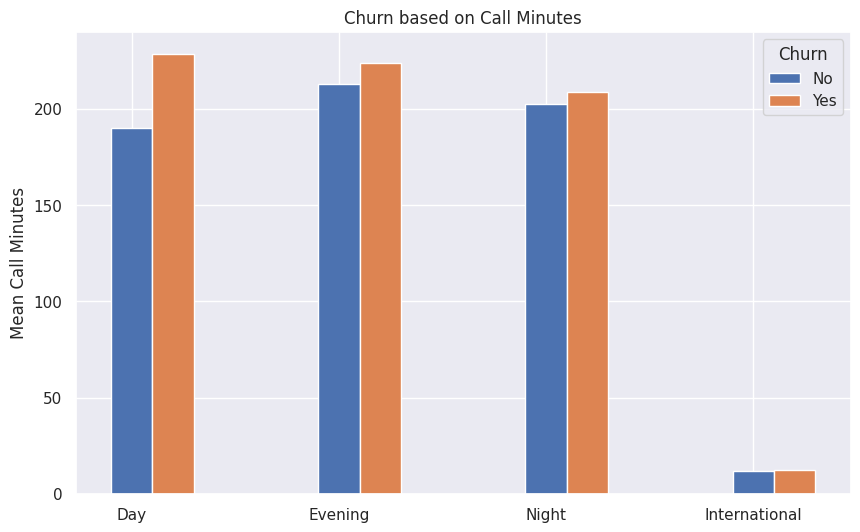

In [60]:
# Calculating mean of different types of call minutes and
# then plotting it in a grouped bar chart to analyse churn rates.

x1 = churn_0['Avg_Day_Minutes'].mean()
y1 = churn_1['Avg_Day_Minutes'].mean()

x2 = churn_0['Avg_Eve_Minutes'].mean()
y2 = churn_1['Avg_Eve_Minutes'].mean()

x3 = churn_0['Avg_Night_Minutes'].mean()
y3 = churn_1['Avg_Night_Minutes'].mean()

x4 = churn_0['Avg_Intl_Minutes'].mean()
y4 = churn_1['Avg_Intl_Minutes'].mean()

p = ['Day','Evening','Night','International']
x_indices = np.arange(len(p))

plt.figure(figsize=[10, 6])
plt.ylabel('Mean Call Minutes')
plt.title('Churn based on Call Minutes')
plt.xticks(x_indices, p)
plt.bar(x_indices, [x1, x2, x3,x4], width=0.20, label='No')
plt.bar(x_indices + 0.20, [y1, y2, y3,y4], width=0.20, label='Yes')
plt.legend(title='Churn', loc = 'upper right')
plt.show()

---

---




**Inference:** The above graph indicates that customers with **high number of call minutes at daytime** are more likely to discontinue their service.


---

Does that mean the customers are being charged more for day calls?

---


---




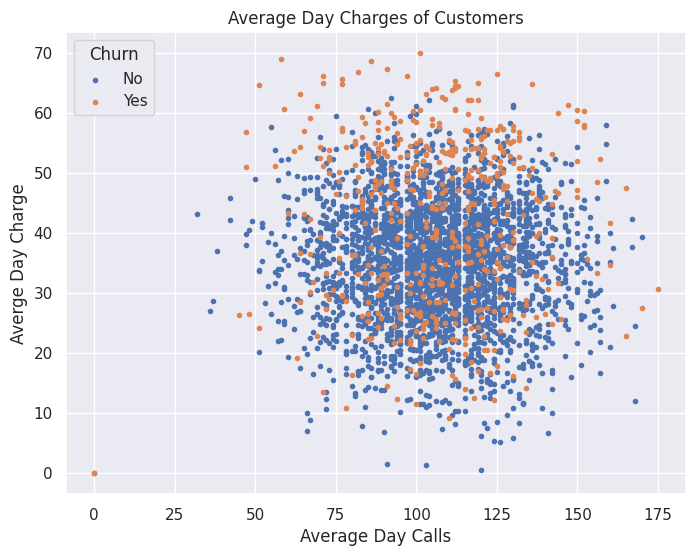

In [20]:
# Plotting 2 scatter charts of average day charges of customers
# with respect to average day calls based on churn.

x0 = churn_0['Avg_Day_Calls']
y0 = churn_0['Avg_Day_Charge']
x1 = churn_1['Avg_Day_Calls']
y1 = churn_1['Avg_Day_Charge']

plt.figure(figsize = [8,6])
plt.xlabel('Average Day Calls')
plt.ylabel('Averge Day Charge')
plt.title('Average Day Charges of Customers')

plt.scatter(x0,y0,label='No',s = 9)
plt.scatter(x1,y1,label='Yes',s = 9)
plt.legend(title='Churn', loc = 'upper left')
plt.show()



---

---




**Inference:** The above plot confirms that customers who have been charged    **high** for their calls during the day have shown a tendency to discontinue their service.

---


---




In [21]:
data['Customer_Service_Calls'].unique()

array([1, 3, 0, 2, 4, 5, 7, 6, 8, 9])

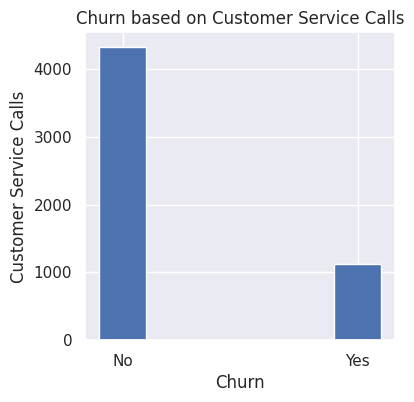

In [75]:
# Analysing churn rates by plotting Customer Service Calls.

x = churn_0['Customer_Service_Calls'].sum()
y = churn_1['Customer_Service_Calls'].sum()

plt.figure(figsize = [4,4])
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.title('Churn based on Customer Service Calls')
plt.bar(['No','Yes'],[x,y], width = 0.20)
plt.show()

---

---




**Inference:** The above graph indicates that customers with **less number of service calls are more likely** to discontinue their service.

---


---



In [23]:
data['VM_Plan'].unique()

array([0, 1])

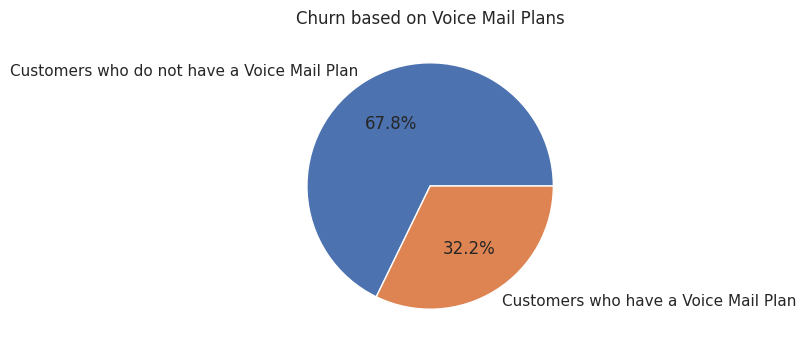

In [24]:
# Creating 2 different datasets based on whether the customers have a voice mail plan or not
# and plotting the percentage of people who discontinued their service in each scenario.


VM0 = data[data['VM_Plan'] == 0]
VM1 = data[data['VM_Plan'] == 1]

x = VM0['Churn'].sum()/VM0['Churn'].count()
y = VM1['Churn'].sum()/VM1['Churn'].count()

plt.figure(figsize = [6,4])
plt.title('Churn based on Voice Mail Plans')
plt.pie([x,y], labels = ['Customers who do not have a Voice Mail Plan','Customers who have a Voice Mail Plan'], autopct = '%1.1f%%')
plt.show()

---

---




**Inference:** The above pie chart indicates that customers who **do not** buy a voice mail plan are more likely to discontinue their service.

---


---




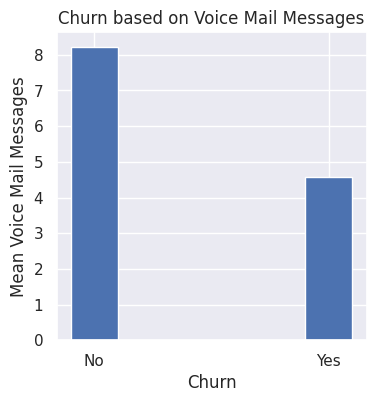

In [71]:
# Analysing churn rates by plotting mean of Voice Mail Messages sent by customers.

x = churn_0['VM_Messages'].mean()
y = churn_1['VM_Messages'].mean()

plt.figure(figsize = [4,4])
plt.xlabel('Churn')
plt.ylabel('Mean Voice Mail Messages')
plt.title('Churn based on Voice Mail Messages')
plt.bar(['No','Yes'],[x,y], width = 0.20)
plt.show()

---

---




**Inference:** The above plot confirms that customers who **do not have a voice mail plan** and thus **do not send voice mail messages** are more likely to discontinue their service.

---


---




### **Checking other parameters for more insights**

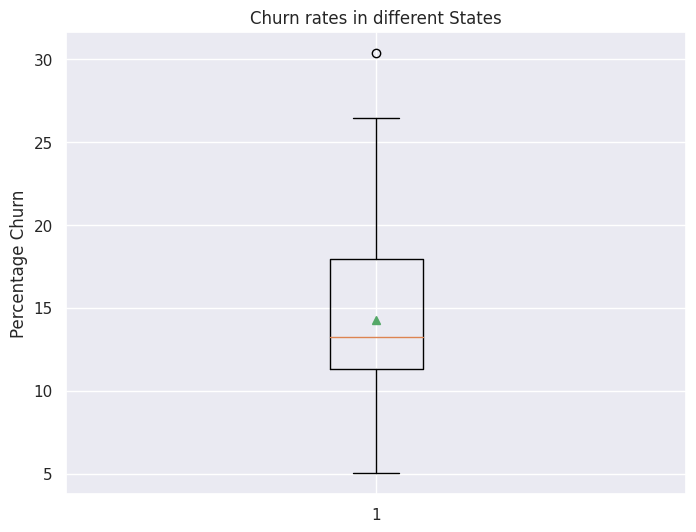

In [40]:
# Plotting the percentage of customers who discontinued their service
# in a particular state out of the total customers living in that state.

x = churn_0.groupby("State_Code")['State_Code'].count()
y = churn_1.groupby("State_Code")['State_Code'].count()

z = (y/(x+y))*100

plt.figure(figsize = [8,6])
plt.ylabel('Percentage Churn')
plt.title('Churn rates in different States')
plt.boxplot(z, showmeans = True)
plt.show()

In [31]:
data['Area_Code'].unique()

array([510, 415, 408])

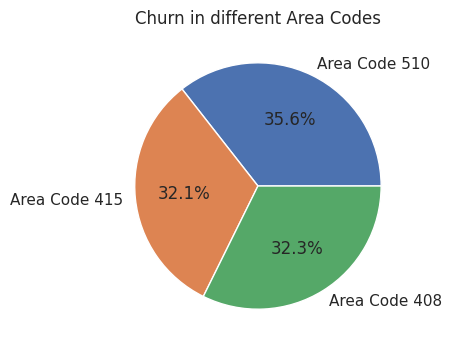

In [32]:
# Creating 3 seperate datasets based on area code and plotting the percentage
# of customers who discontinued their service out of the total customers with that area code.

Area510 = data[data['Area_Code'] == 510]
Area415 = data[data['Area_Code'] == 415]
Area408 = data[data['Area_Code'] == 408]

x = Area510['Churn'].sum()/Area510['Churn'].count()
y = Area415['Churn'].sum()/Area415['Churn'].count()
z = Area408['Churn'].sum()/Area408['Churn'].count()

plt.figure(figsize = [6,4])
plt.title('Churn in different Area Codes')
plt.pie([x,y,z], labels = ['Area Code 510','Area Code 415','Area Code 408'], autopct = '%1.1f%%')
plt.show()

---



---


**Inference:** All the three areas have almost equal churn rates.
.

---

---

**So now we check each area code on different parameters to have a better insight**

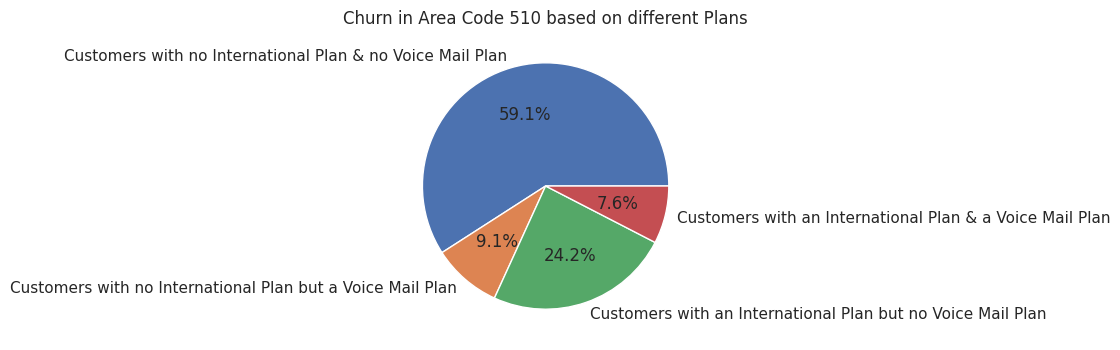

In [33]:
# Analysing churn rates in customers in Area code 510 in different scenarios
# based on their possession of International and Voice Mail Plans.

Area_510_Int_0 = Area510[Area510['Intl_Plan'] == 0]

Area_510_Int_0_VM_0 = Area_510_Int_0[Area_510_Int_0['VM_Plan'] == 0]
Area_510_Int_0_VM_1 = Area_510_Int_0[Area_510_Int_0['VM_Plan'] == 1]

x = Area_510_Int_0_VM_0['Churn'].sum()/Area510['Churn'].count()
y = Area_510_Int_0_VM_1['Churn'].sum()/Area510['Churn'].count()

Area_510_Int_1 = Area510[Area510['Intl_Plan'] == 1]

Area_510_Int_1_VM_0 = Area_510_Int_1[Area_510_Int_1['VM_Plan'] == 0]
Area_510_Int_1_VM_1 = Area_510_Int_1[Area_510_Int_1['VM_Plan'] == 1]

p = Area_510_Int_1_VM_0['Churn'].sum()/Area510['Churn'].count()
q = Area_510_Int_1_VM_1['Churn'].sum()/Area510['Churn'].count()

plt.figure(figsize = [6,4])
plt.title('Churn in Area Code 510 based on different Plans')
plt.pie([x,y,p,q], labels = ['Customers with no International Plan & no Voice Mail Plan','Customers with no International Plan but a Voice Mail Plan',
                         'Customers with an International Plan but no Voice Mail Plan','Customers with an International Plan & a Voice Mail Plan'], autopct = '%1.1f%%')
plt.show()

---



---


**Inference:** In Area Code 510, customers with neither an international plan nor a voice mail plan are the most likely to discontinue their service **(59.1%)** followed by customers with an international plan but no voice mail plan **(24.2%)**.

---

---

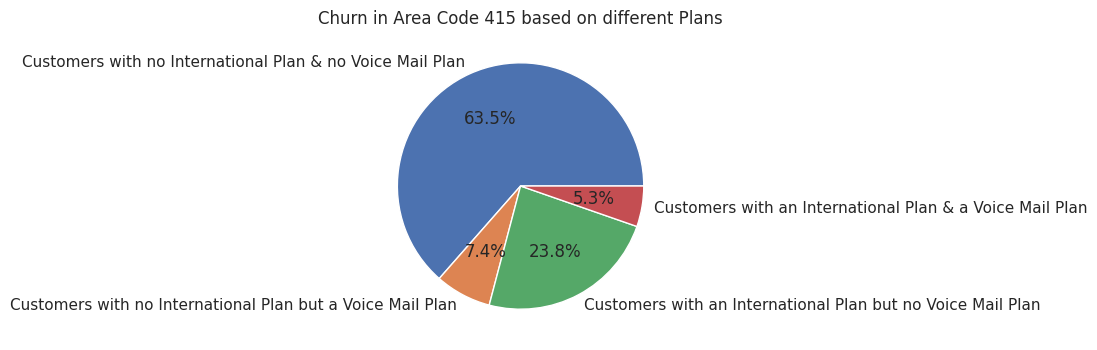

In [34]:
# Analysing churn rates in customers in Area code 415 in different scenarios
# based on their possession of International and Voice Mail Plans.


Area_415_Int_0 = Area415[Area415['Intl_Plan'] == 0]

Area_415_Int_0_VM_0 = Area_415_Int_0[Area_415_Int_0['VM_Plan'] == 0]
Area_415_Int_0_VM_1 = Area_415_Int_0[Area_415_Int_0['VM_Plan'] == 1]

x = Area_415_Int_0_VM_0['Churn'].sum()/Area415['Churn'].count()
y = Area_415_Int_0_VM_1['Churn'].sum()/Area415['Churn'].count()


Area_415_Int_1 = Area415[Area415['Intl_Plan'] == 1]

Area_415_Int_1_VM_0 = Area_415_Int_1[Area_415_Int_1['VM_Plan'] == 0]
Area_415_Int_1_VM_1 = Area_415_Int_1[Area_415_Int_1['VM_Plan'] == 1]

p = Area_415_Int_1_VM_0['Churn'].sum()/Area415['Churn'].count()
q = Area_415_Int_1_VM_1['Churn'].sum()/Area415['Churn'].count()

plt.figure(figsize = [6,4])
plt.title('Churn in Area Code 415 based on different Plans')
plt.pie([x,y,p,q], labels = ['Customers with no International Plan & no Voice Mail Plan','Customers with no International Plan but a Voice Mail Plan',
                         'Customers with an International Plan but no Voice Mail Plan','Customers with an International Plan & a Voice Mail Plan'], autopct = '%1.1f%%')
plt.show()


---



---


**Inference:** In Area Code 415, customers with neither an international plan nor a voice mail plan are the most likely to discontinue their service  **(63.5%)** followed by customers with an international plan but no voice mail plan **(23.8%)**.

---

---

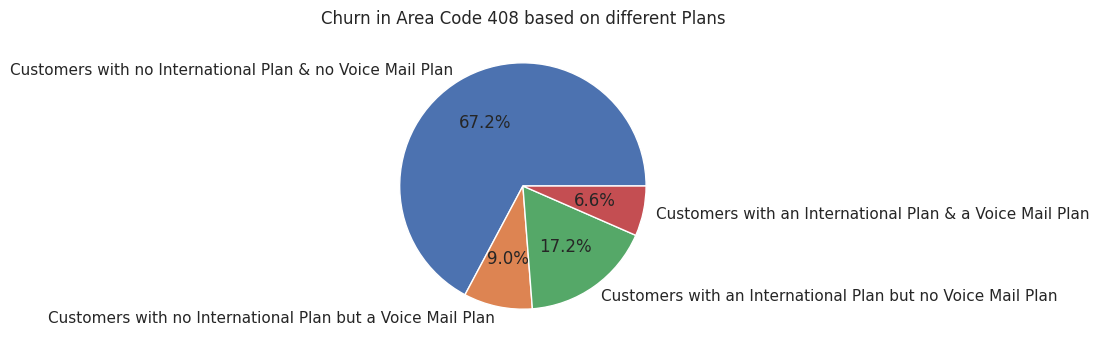

In [35]:
# Analysing churn rates in customers in Area code 408 in different scenarios
# based on their possession of International and Voice Mail Plans.

Area_408_Int_0 = Area408[Area408['Intl_Plan'] == 0]

Area_408_Int_0_VM_0 = Area_408_Int_0[Area_408_Int_0['VM_Plan'] == 0]
Area_408_Int_0_VM_1 = Area_408_Int_0[Area_408_Int_0['VM_Plan'] == 1]

x = Area_408_Int_0_VM_0['Churn'].sum()/Area408['Churn'].count()
y = Area_408_Int_0_VM_1['Churn'].sum()/Area408['Churn'].count()

Area_408_Int_1 = Area408[Area408['Intl_Plan'] == 1]

Area_408_Int_1_VM_0 = Area_408_Int_1[Area_408_Int_1['VM_Plan'] == 0]
Area_408_Int_1_VM_1 = Area_408_Int_1[Area_408_Int_1['VM_Plan'] == 1]

p = Area_408_Int_1_VM_0['Churn'].sum()/Area408['Churn'].count()
q = Area_408_Int_1_VM_1['Churn'].sum()/Area408['Churn'].count()

plt.figure(figsize = [6,4])
plt.title('Churn in Area Code 408 based on different Plans')
plt.pie([x,y,p,q], labels = ['Customers with no International Plan & no Voice Mail Plan','Customers with no International Plan but a Voice Mail Plan',
                         'Customers with an International Plan but no Voice Mail Plan','Customers with an International Plan & a Voice Mail Plan'], autopct = '%1.1f%%')
plt.show()

---



---


**Inference:** In Area Code 408, customers with neither an international plan nor a voice mail plan are the most likely to discontinue their service **(67.2%)** followed by customers with an international plan but no voice mail plan **(17.2%)**.

---

---

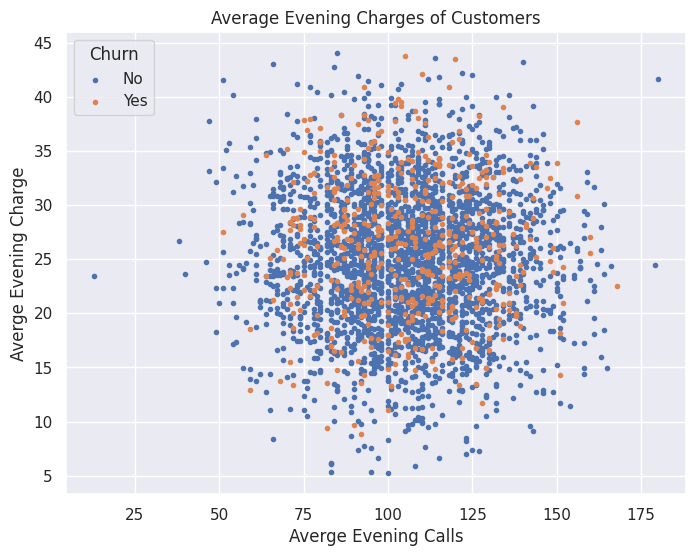

In [27]:
# Plotting 2 scatter charts of average evening charges of customers
# with respect to average evening calls based on churn.

x0 = churn_0['Avg_Eve_Calls']
y0 = churn_0['Avg_Eve_Charge']
x1 = churn_1['Avg_Eve_Calls']
y1 = churn_1['Avg_Eve_Charge']

plt.figure(figsize = [8,6])
plt.xlabel('Averge Evening Calls')
plt.ylabel('Averge Evening Charge')
plt.title('Average Evening Charges of Customers')

plt.scatter(x0,y0,label='No',s = 9)
plt.scatter(x1,y1,label='Yes',s = 9)
plt.legend(title='Churn', loc = 'upper left')
plt.show()

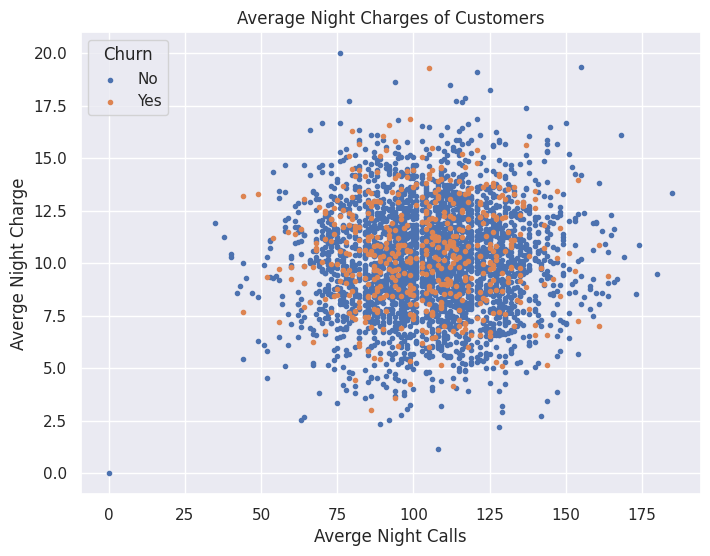

In [28]:
# Plotting 2 scatter charts of average night charges of customers
# with respect to average night calls based on churn.

x0 = churn_0['Avg_Night_Calls']
y0 = churn_0['Avg_Night_Charge']
x1 = churn_1['Avg_Night_Calls']
y1 = churn_1['Avg_Night_Charge']

plt.figure(figsize = [8,6])
plt.xlabel('Averge Night Calls')
plt.ylabel('Averge Night Charge')
plt.title('Average Night Charges of Customers')

plt.scatter(x0,y0,label='No',s = 9)
plt.scatter(x1,y1,label='Yes',s = 9)
plt.legend(title='Churn', loc = 'upper left')
plt.show()

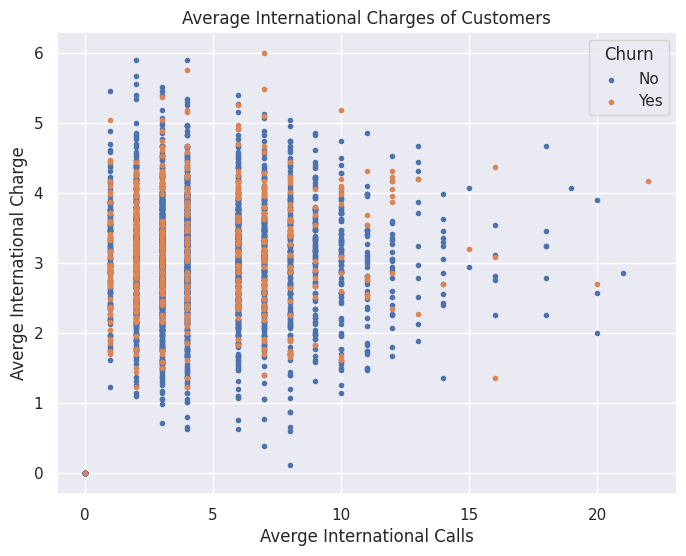

In [29]:
# Plotting 2 scatter charts of average international charges of customers
# with respect to average international calls based on churn.

x0 = churn_0['Avg_Intl_Calls']
y0 = churn_0['Avg_Intl_Charge']
x1 = churn_1['Avg_Intl_Calls']
y1 = churn_1['Avg_Intl_Charge']

plt.figure(figsize = [8,6])
plt.xlabel('Averge International Calls')
plt.ylabel('Averge International Charge')
plt.title('Average International Charges of Customers')

plt.scatter(x0,y0,label='No',s = 9)
plt.scatter(x1,y1,label='Yes',s = 9)
plt.legend(title='Churn', loc = 'upper right')
plt.show()

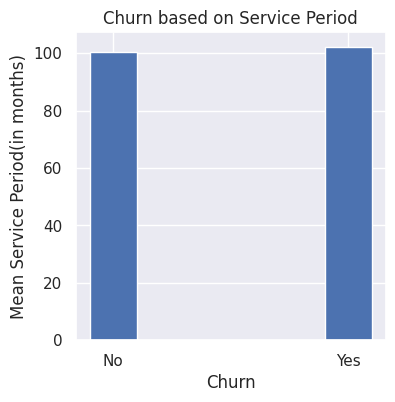

In [30]:
# Analysing churn rates by plotting mean of account length of customers.

x = churn_0['Account_Length_Months'].mean()
y = churn_1['Account_Length_Months'].mean()

plt.figure(figsize = [4,4])
plt.xlabel('Churn')
plt.ylabel('Mean Service Period(in months)')
plt.title('Churn based on Service Period')
plt.bar(['No','Yes'],[x,y], width = 0.20)
plt.show()



---



---



# **Final Insights**

Following factors are responsible for increasing churn rates of customers:


*   International Plan used by customers
*   Average call minutes in day time, which further indicates that customers are charged more in day time

*   Customers with less number of service calls to the comapny
*   Absence of a Voice Mail Plan, which is further confirmed by the fact that customers who sent less voice mail messages are more likely to discontinue their service

*   In Area Code 510, customers with neither an international plan nor a voice mail plan are the most likely to discontinue their service **(59.1%)**
*   In Area Code 415, customers with neither an international plan nor a voice mail plan are the most likely to discontinue their service  **(63.5%)**


*   In Area Code 408, customers with neither an international plan nor a voice mail plan are the most likely to discontinue their service **(67.2%)**